In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler , RobustScaler
from sklearn.model_selection import cross_val_score
data = pd.read_csv('E:/term6/Machine Learning/indian_liver_patient.csv')
# data = pd.read_csv('C:/Users/TOSHIBA/Desktop/ML_Project/indian_liver_patient.csv')

duplicate = data[data.duplicated()]
print(duplicate)

In [2]:
for item in data["Gender"]:
    data["Gender"] = data["Gender"].replace("Female", 1)
    data["Gender"] = data["Gender"].replace("Male", 0)
print(data["Gender"].head(10))


0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: Gender, dtype: int64


In [3]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB
None


In [5]:
x = data['Albumin_and_Globulin_Ratio'].mean()
data['Albumin_and_Globulin_Ratio'].fillna(x, inplace = True)

In [6]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

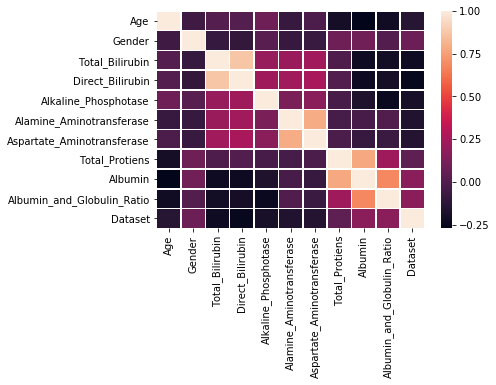

In [8]:
corr = data.corr()
ax = sb.heatmap(corr, linewidth=0.5)
plt.show()

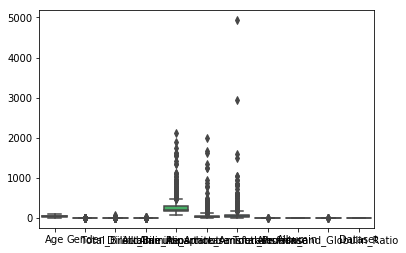

In [9]:
data = data.dropna(axis = 0)
sb.boxplot(data = data)

In [10]:
scaler = RobustScaler()
data = scaler.fit_transform(data.to_numpy())
data = pd.DataFrame(data, columns=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase' ,'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset'])

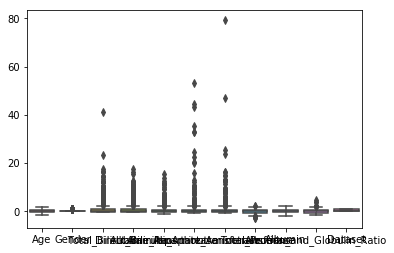

In [11]:
data = data.dropna(axis = 0)
sb.boxplot(data = data)

In [12]:
features = np.array(data.drop(['Dataset'], axis=1))
labels = np.array(data['Dataset'])
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4)

scaler = MinMaxScaler()
data = scaler.fit_transform(data.to_numpy())
data = pd.DataFrame(data, columns=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase' ,'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset'])

In [14]:
print(data)

      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    0.80     1.0        -0.166667         -0.181818             -0.172131   
1    0.68     0.0         5.500000          4.727273              4.024590   
2    0.68     0.0         3.500000          3.454545              2.311475   
3    0.52     0.0         0.000000          0.090909             -0.213115   
4    1.08     0.0         1.611111          1.545455             -0.106557   
5    0.04     0.0         0.444444          0.363636              0.000000   
6   -0.76     1.0        -0.055556         -0.090909             -0.442623   
7   -0.64     1.0        -0.055556          0.000000             -0.049180   
8   -1.12     0.0        -0.055556          0.000000             -0.049180   
9    0.40     0.0        -0.166667         -0.090909              0.672131   
10   0.48     0.0        -0.222222         -0.181818              0.016393   
11   1.08     0.0         0.944444          0.909091            

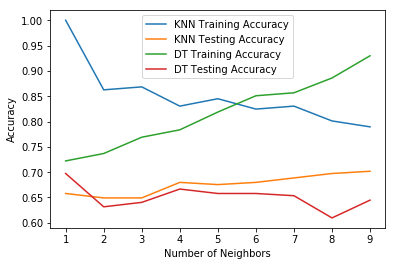

In [15]:
neighbors = np.arange(1, 10)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)
plt.plot(neighbors, train_accuracies.values(), label="KNN Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="KNN Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")


depths = np.arange(1, 10)
train_accuracies = {}
test_accuracies = {}

for depth in depths:
    DT = DecisionTreeClassifier(max_depth=depth)
    DT.fit(x_train, y_train)
    train_accuracies[depth] = DT.score(x_train, y_train)
    test_accuracies[depth] = DT.score(x_test, y_test)
plt.plot(depths, train_accuracies.values(), label="DT Training Accuracy")
plt.plot(depths, test_accuracies.values(), label="DT Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [16]:
classifier = DecisionTreeClassifier(max_depth=4)
c=classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
print('Decision Tree Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_predict)*100 ))

Decision Tree Accuracy: 66.23%


In [17]:
k_classifier = KNeighborsClassifier(n_neighbors=4)
k = k_classifier.fit(x_train,y_train)
y_predict = k_classifier.predict(x_test)
print('KNN Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_predict)*100 ))

KNN Accuracy: 67.98%


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (39) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\skl

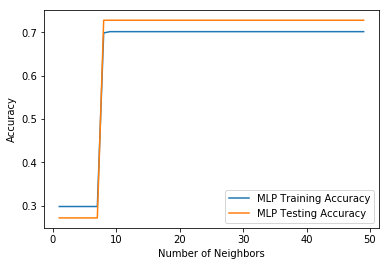

In [63]:
iters = np.arange(1, 50)
train_accuracies = {}
test_accuracies = {}

for iterr in iters:
    mlp = MLPClassifier(
    max_iter=iterr,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
    )
    mlp.fit(x_train, y_train)
    train_accuracies[iterr] = mlp.score(x_train, y_train)
    test_accuracies[iterr] = mlp.score(x_test, y_test)
plt.plot(iters, train_accuracies.values(), label="MLP Training Accuracy")
plt.plot(iters, test_accuracies.values(), label="MLP Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [66]:
mlp = MLPClassifier(
    max_iter=1000,
    random_state=42
)
mlp.fit(x_train, y_train)
mlp_predict = mlp.predict(x_test)
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))

MLP Accuracy: 70.61%


In [65]:
from sklearn import svm
svm_classifier = svm.SVC(kernel = 'linear')
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
print('SVM Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

MLP Accuracy: 72.81%


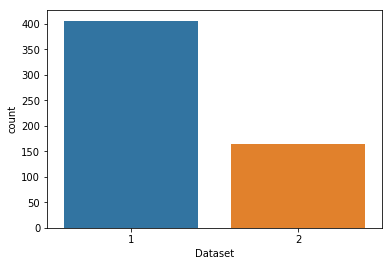

In [1027]:
sb.countplot(x='Dataset', data=data)

In [1008]:
#pip install imblearn